## Importing the need packages

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np
import os

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

## Defining features and target(s)

In [3]:
features = [
    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK",

    "OP_CARRIER_AIRLINE_ID",
    "TAIL_NUM",
    "OP_CARRIER_FL_NUM",

    "ORIGIN_AIRPORT_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_WAC",
    "DEST_AIRPORT_ID",
    "DEST_CITY_MARKET_ID",
    "DEST_STATE_FIPS",
    "DEST_WAC",
    
    "CRS_DEP_TIME",
    "DEP_TIME_BLK",
    "CRS_ARR_TIME",
    "ARR_TIME_BLK",
    "CRS_ELAPSED_TIME",
    "DISTANCE",
    "DISTANCE_GROUP",
]

target = "DEP_DELAY"

## Importing the training datasets

In [4]:
# Get the current script's directory
current_script_dir = os.getcwd()

# Move up to the parent directory
parent_dir = os.path.dirname(current_script_dir)

# Define the sibling data directory name
data_dir = os.path.join(parent_dir, 'data')

# Load the 2022 training datset
# Use os.path.join to create the full file path
training_dataset_filename = "encoded_training_dataset_2022.csv"
file_path = os.path.join(data_dir, training_dataset_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
training_df = df[features+ [target]]

# Display the DataFrame
display(training_df)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,DEP_DELAY
0,1,1,1,6,20363,360,4732,10135,30135,42,23,11433,31295,26,43,1015,5,1209,7,114,425,2,-1
1,1,1,1,6,20363,360,5430,11433,31295,26,43,10135,30135,42,23,1422,9,1548,10,86,425,2,-3
2,1,1,1,6,20363,414,4671,10397,30397,13,34,14783,34783,29,64,2057,15,2149,16,112,563,3,-5
3,1,1,1,6,20363,414,5009,13487,31650,27,63,11423,31423,19,61,1041,5,1153,6,72,232,1,-3
4,1,1,1,6,20363,414,5083,11423,31423,19,61,10397,30397,13,34,1300,8,1610,11,130,743,3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6551768,4,12,31,6,20452,5292,5741,12953,31703,36,22,11066,31066,39,44,830,3,1038,5,128,479,2,-7
6551769,4,12,31,6,20452,6245,3607,14321,34321,23,12,13930,30977,17,41,635,1,758,2,143,900,4,-7
6551770,4,12,31,6,20452,6245,3686,13930,30977,17,41,14321,34321,23,12,1800,13,2129,16,149,900,4,-7
6551771,4,12,31,6,20452,6245,3699,11003,31003,19,61,13930,30977,17,41,1508,10,1627,11,79,196,1,-10


## Viewing the types of columns

In [5]:
training_df = df[features+ [target]].copy()

In [6]:
training_df.dtypes

QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
OP_CARRIER_AIRLINE_ID    int64
TAIL_NUM                 int64
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN_STATE_FIPS        int64
ORIGIN_WAC               int64
DEST_AIRPORT_ID          int64
DEST_CITY_MARKET_ID      int64
DEST_STATE_FIPS          int64
DEST_WAC                 int64
CRS_DEP_TIME             int64
DEP_TIME_BLK             int64
CRS_ARR_TIME             int64
ARR_TIME_BLK             int64
CRS_ELAPSED_TIME         int64
DISTANCE                 int64
DISTANCE_GROUP           int64
DEP_DELAY                int64
dtype: object

In [7]:
categorical_columns = [
    "OP_CARRIER_AIRLINE_ID",
    "TAIL_NUM",
    "OP_CARRIER_FL_NUM",

    "ORIGIN_AIRPORT_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_WAC",
    "DEST_AIRPORT_ID",
    "DEST_CITY_MARKET_ID",
    "DEST_STATE_FIPS",
    "DEST_WAC",
    
    "DISTANCE_GROUP",
]

for column in categorical_columns:
    training_df[column] = df[column].astype('category')

In [8]:
training_df.dtypes

QUARTER                     int64
MONTH                       int64
DAY_OF_MONTH                int64
DAY_OF_WEEK                 int64
OP_CARRIER_AIRLINE_ID    category
TAIL_NUM                 category
OP_CARRIER_FL_NUM        category
ORIGIN_AIRPORT_ID        category
ORIGIN_CITY_MARKET_ID    category
ORIGIN_STATE_FIPS        category
ORIGIN_WAC               category
DEST_AIRPORT_ID          category
DEST_CITY_MARKET_ID      category
DEST_STATE_FIPS          category
DEST_WAC                 category
CRS_DEP_TIME                int64
DEP_TIME_BLK                int64
CRS_ARR_TIME                int64
ARR_TIME_BLK                int64
CRS_ELAPSED_TIME            int64
DISTANCE                    int64
DISTANCE_GROUP           category
DEP_DELAY                   int64
dtype: object

## Defining functions for model evaluation

In [9]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [10]:
def evaluate_model(data_df, features_columns, target_column):
    features = data_df[features_columns]
    target = data_df[target_column]
    X_array = features.values
    y_array = target.values
    
    rmse_scores = []
    mae_scores = []
    
    kf = KFold(n_splits=2, shuffle=True, random_state=123)
    
    for train_index, test_index in kf.split(X_array):
        model = xgb.XGBRegressor(
            enable_categorical=True,
            objective='reg:squarederror', 
            eval_metric='rmse',
            random_state=123
        )
        
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        rmse_scores.append(rmse(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        
    return np.mean(rmse_scores), np.mean(mae_scores)

## Training and Evaluation using 2-fold Cross Validation

In [11]:
rmse_score, mae_score = evaluate_model(
    data_df=training_df, 
    features_columns=features, 
    target_column=target
)
print("Evaluation Root Mean Squared Error:", rmse_score)
print("Evaluation Mean Absolute Error:", mae_score)

Evaluation Root Mean Squared Error: 53.12565059730653
Evaluation Mean Absolute Error: 21.806202293859503


## Tuning

In [12]:
X = training_df[features].values
y = training_df[target].values

### Tuning Learning Rate

Trying learning_rate = 0.01, K-Fold: 1
Trying learning_rate = 0.01, K-Fold: 2
Trying learning_rate = 0.03, K-Fold: 1
Trying learning_rate = 0.03, K-Fold: 2
Trying learning_rate = 0.06, K-Fold: 1
Trying learning_rate = 0.06, K-Fold: 2
Trying learning_rate = 0.09, K-Fold: 1
Trying learning_rate = 0.09, K-Fold: 2
Trying learning_rate = 0.1, K-Fold: 1
Trying learning_rate = 0.1, K-Fold: 2
Trying learning_rate = 0.13, K-Fold: 1
Trying learning_rate = 0.13, K-Fold: 2
Trying learning_rate = 0.16, K-Fold: 1
Trying learning_rate = 0.16, K-Fold: 2
Trying learning_rate = 0.19, K-Fold: 1
Trying learning_rate = 0.19, K-Fold: 2
Trying learning_rate = 0.2, K-Fold: 1
Trying learning_rate = 0.2, K-Fold: 2
Trying learning_rate = 0.23, K-Fold: 1
Trying learning_rate = 0.23, K-Fold: 2
Trying learning_rate = 0.26, K-Fold: 1
Trying learning_rate = 0.26, K-Fold: 2
Trying learning_rate = 0.29, K-Fold: 1
Trying learning_rate = 0.29, K-Fold: 2
Trying learning_rate = 0.3, K-Fold: 1
Trying learning_rate = 0.3, K-

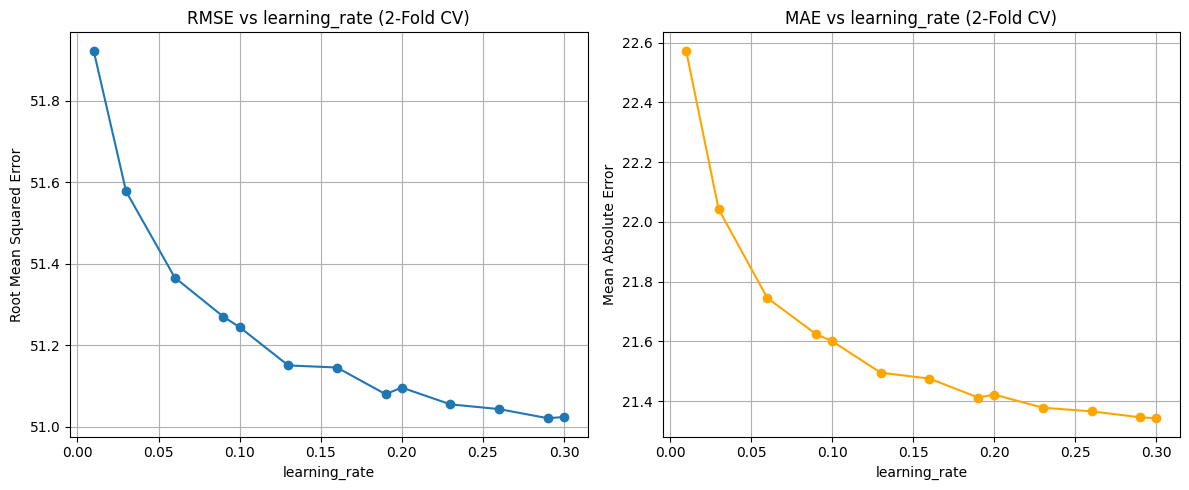

Trying n_estimators = 100, K-Fold: 1
Trying n_estimators = 100, K-Fold: 2
Trying n_estimators = 200, K-Fold: 1
Trying n_estimators = 200, K-Fold: 2
Trying n_estimators = 300, K-Fold: 1
Trying n_estimators = 300, K-Fold: 2
Trying n_estimators = 400, K-Fold: 1
Trying n_estimators = 400, K-Fold: 2
Trying n_estimators = 500, K-Fold: 1
Trying n_estimators = 500, K-Fold: 2
Trying n_estimators = 600, K-Fold: 1
Trying n_estimators = 600, K-Fold: 2
Trying n_estimators = 700, K-Fold: 1
Trying n_estimators = 700, K-Fold: 2
Trying n_estimators = 800, K-Fold: 1
Trying n_estimators = 800, K-Fold: 2
Trying n_estimators = 900, K-Fold: 1
Trying n_estimators = 900, K-Fold: 2
Trying n_estimators = 1000, K-Fold: 1
Trying n_estimators = 1000, K-Fold: 2


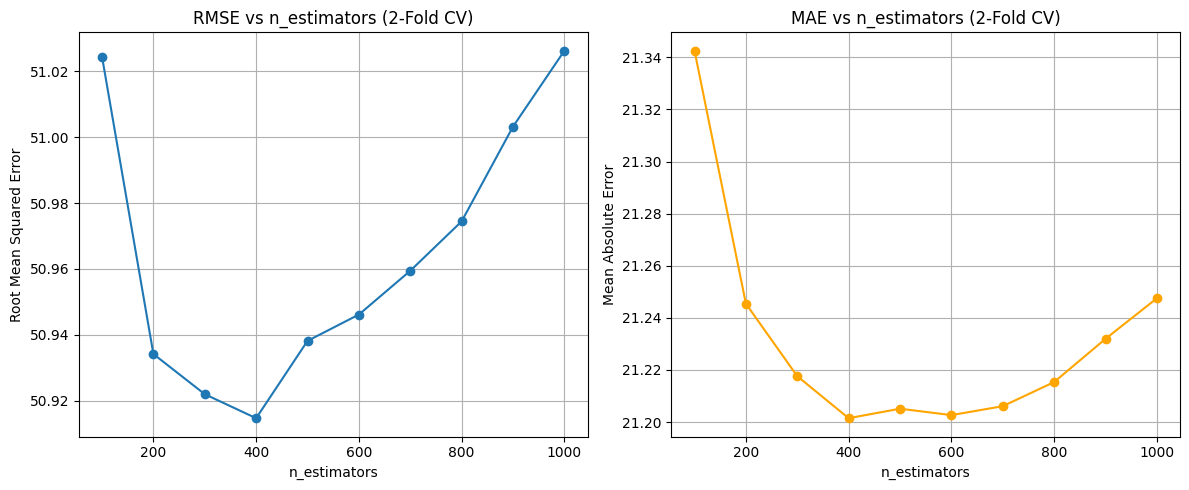

Trying max_depth = 3, K-Fold: 1
Trying max_depth = 3, K-Fold: 2
Trying max_depth = 4, K-Fold: 1
Trying max_depth = 4, K-Fold: 2
Trying max_depth = 5, K-Fold: 1
Trying max_depth = 5, K-Fold: 2
Trying max_depth = 6, K-Fold: 1
Trying max_depth = 6, K-Fold: 2
Trying max_depth = 7, K-Fold: 1
Trying max_depth = 7, K-Fold: 2
Trying max_depth = 8, K-Fold: 1
Trying max_depth = 8, K-Fold: 2
Trying max_depth = 9, K-Fold: 1
Trying max_depth = 9, K-Fold: 2
Trying max_depth = 10, K-Fold: 1
Trying max_depth = 10, K-Fold: 2


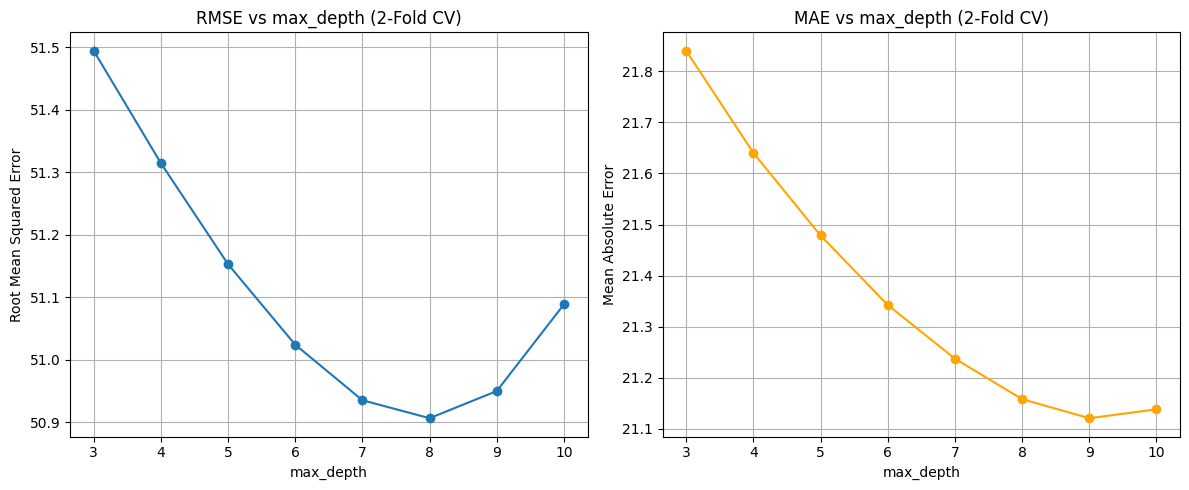

Trying min_child_weight = 1, K-Fold: 1
Trying min_child_weight = 1, K-Fold: 2
Trying min_child_weight = 2, K-Fold: 1
Trying min_child_weight = 2, K-Fold: 2
Trying min_child_weight = 3, K-Fold: 1
Trying min_child_weight = 3, K-Fold: 2
Trying min_child_weight = 4, K-Fold: 1
Trying min_child_weight = 4, K-Fold: 2
Trying min_child_weight = 5, K-Fold: 1
Trying min_child_weight = 5, K-Fold: 2
Trying min_child_weight = 6, K-Fold: 1
Trying min_child_weight = 6, K-Fold: 2
Trying min_child_weight = 7, K-Fold: 1
Trying min_child_weight = 7, K-Fold: 2
Trying min_child_weight = 8, K-Fold: 1
Trying min_child_weight = 8, K-Fold: 2
Trying min_child_weight = 9, K-Fold: 1
Trying min_child_weight = 9, K-Fold: 2
Trying min_child_weight = 10, K-Fold: 1
Trying min_child_weight = 10, K-Fold: 2


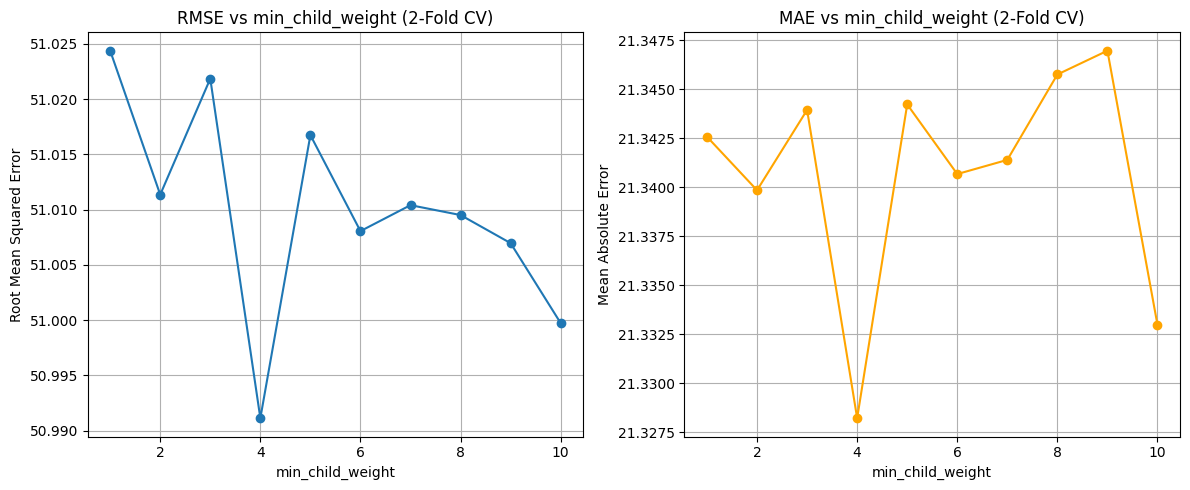

Trying subsample = 0.5, K-Fold: 1
Trying subsample = 0.5, K-Fold: 2
Trying subsample = 0.6, K-Fold: 1
Trying subsample = 0.6, K-Fold: 2
Trying subsample = 0.7, K-Fold: 1
Trying subsample = 0.7, K-Fold: 2
Trying subsample = 0.8, K-Fold: 1
Trying subsample = 0.8, K-Fold: 2
Trying subsample = 0.9, K-Fold: 1
Trying subsample = 0.9, K-Fold: 2
Trying subsample = 1.0, K-Fold: 1
Trying subsample = 1.0, K-Fold: 2


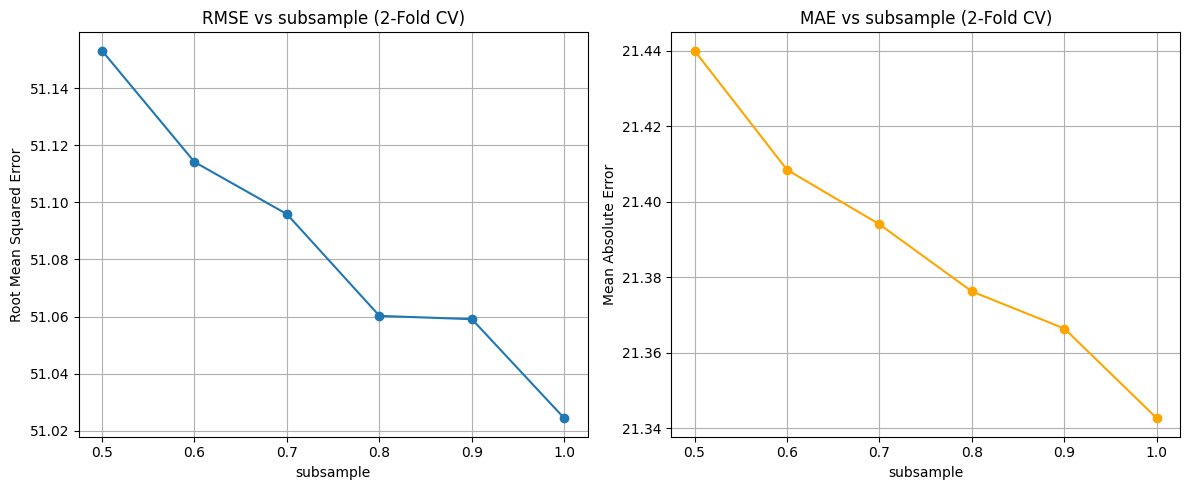

Trying colsample_bytree = 0.5, K-Fold: 1
Trying colsample_bytree = 0.5, K-Fold: 2
Trying colsample_bytree = 0.6, K-Fold: 1
Trying colsample_bytree = 0.6, K-Fold: 2
Trying colsample_bytree = 0.7, K-Fold: 1
Trying colsample_bytree = 0.7, K-Fold: 2
Trying colsample_bytree = 0.8, K-Fold: 1
Trying colsample_bytree = 0.8, K-Fold: 2
Trying colsample_bytree = 0.9, K-Fold: 1
Trying colsample_bytree = 0.9, K-Fold: 2
Trying colsample_bytree = 1.0, K-Fold: 1
Trying colsample_bytree = 1.0, K-Fold: 2


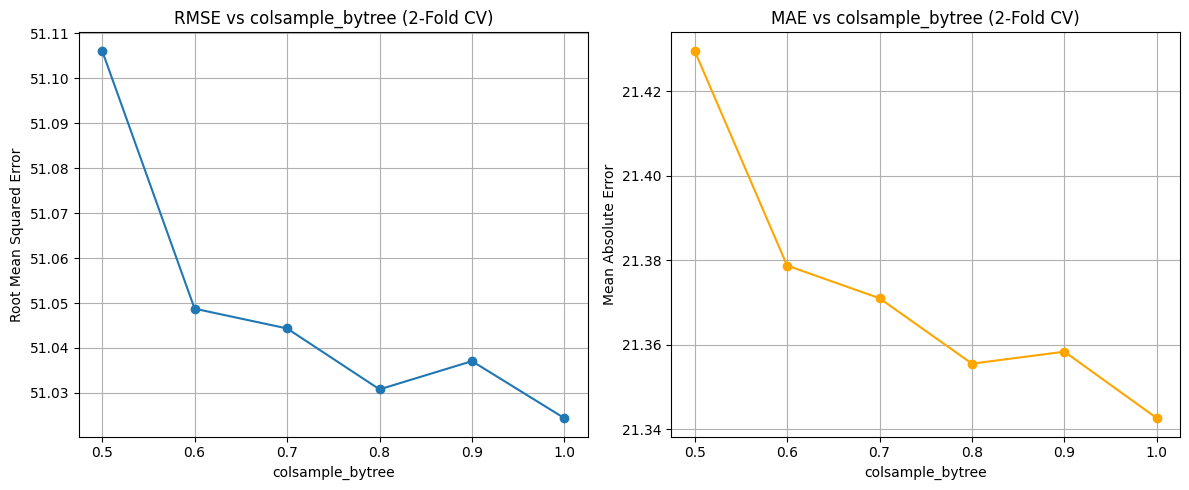

Trying min_split_loss = 0, K-Fold: 1
Trying min_split_loss = 0, K-Fold: 2
Trying min_split_loss = 1, K-Fold: 1
Trying min_split_loss = 1, K-Fold: 2
Trying min_split_loss = 2, K-Fold: 1
Trying min_split_loss = 2, K-Fold: 2
Trying min_split_loss = 3, K-Fold: 1
Trying min_split_loss = 3, K-Fold: 2
Trying min_split_loss = 4, K-Fold: 1
Trying min_split_loss = 4, K-Fold: 2
Trying min_split_loss = 5, K-Fold: 1
Trying min_split_loss = 5, K-Fold: 2
Trying min_split_loss = 6, K-Fold: 1
Trying min_split_loss = 6, K-Fold: 2
Trying min_split_loss = 7, K-Fold: 1
Trying min_split_loss = 7, K-Fold: 2
Trying min_split_loss = 8, K-Fold: 1
Trying min_split_loss = 8, K-Fold: 2
Trying min_split_loss = 9, K-Fold: 1
Trying min_split_loss = 9, K-Fold: 2
Trying min_split_loss = 10, K-Fold: 1
Trying min_split_loss = 10, K-Fold: 2


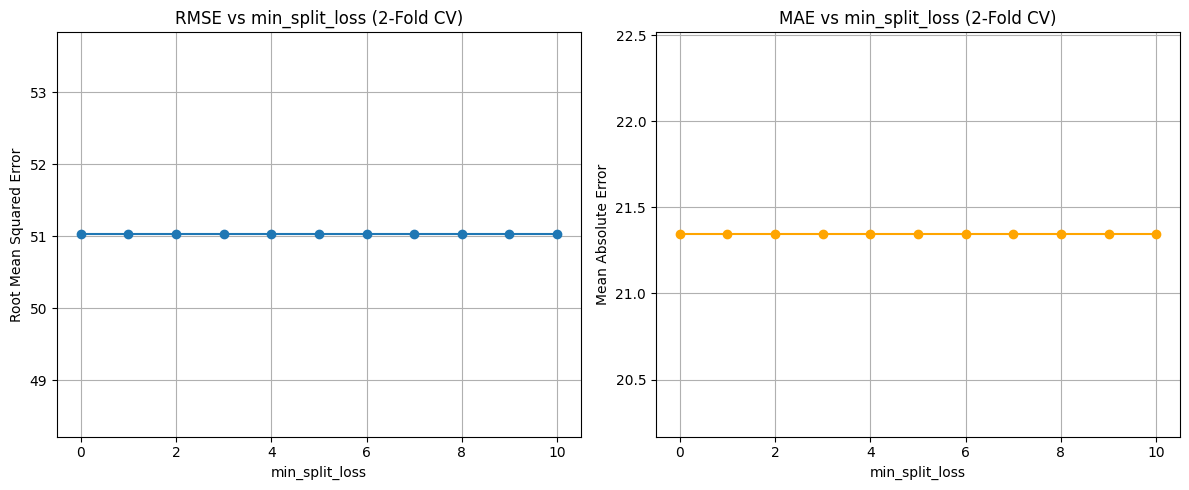

Trying reg_alpha = 0, K-Fold: 1
Trying reg_alpha = 0, K-Fold: 2
Trying reg_alpha = 0.1, K-Fold: 1
Trying reg_alpha = 0.1, K-Fold: 2
Trying reg_alpha = 0.2, K-Fold: 1
Trying reg_alpha = 0.2, K-Fold: 2
Trying reg_alpha = 0.3, K-Fold: 1
Trying reg_alpha = 0.3, K-Fold: 2
Trying reg_alpha = 0.4, K-Fold: 1
Trying reg_alpha = 0.4, K-Fold: 2
Trying reg_alpha = 0.5, K-Fold: 1
Trying reg_alpha = 0.5, K-Fold: 2
Trying reg_alpha = 0.6, K-Fold: 1
Trying reg_alpha = 0.6, K-Fold: 2
Trying reg_alpha = 0.7, K-Fold: 1
Trying reg_alpha = 0.7, K-Fold: 2
Trying reg_alpha = 0.8, K-Fold: 1
Trying reg_alpha = 0.8, K-Fold: 2
Trying reg_alpha = 0.9, K-Fold: 1
Trying reg_alpha = 0.9, K-Fold: 2
Trying reg_alpha = 1, K-Fold: 1
Trying reg_alpha = 1, K-Fold: 2


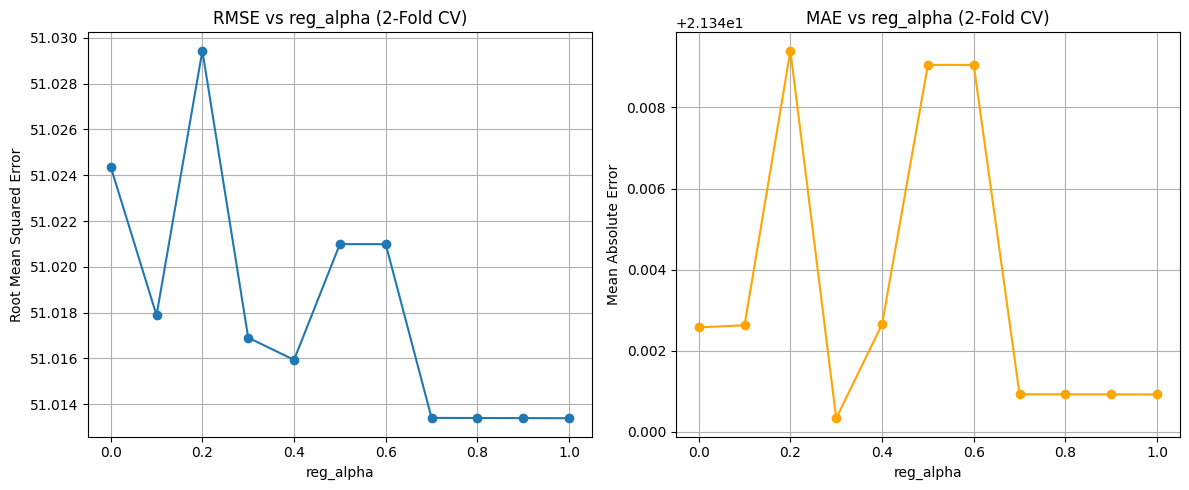

Trying reg_lambda = 0, K-Fold: 1
Trying reg_lambda = 0, K-Fold: 2
Trying reg_lambda = 0.1, K-Fold: 1
Trying reg_lambda = 0.1, K-Fold: 2
Trying reg_lambda = 0.2, K-Fold: 1
Trying reg_lambda = 0.2, K-Fold: 2
Trying reg_lambda = 0.3, K-Fold: 1
Trying reg_lambda = 0.3, K-Fold: 2
Trying reg_lambda = 0.4, K-Fold: 1
Trying reg_lambda = 0.4, K-Fold: 2
Trying reg_lambda = 0.5, K-Fold: 1
Trying reg_lambda = 0.5, K-Fold: 2
Trying reg_lambda = 0.6, K-Fold: 1
Trying reg_lambda = 0.6, K-Fold: 2
Trying reg_lambda = 0.7, K-Fold: 1
Trying reg_lambda = 0.7, K-Fold: 2
Trying reg_lambda = 0.8, K-Fold: 1
Trying reg_lambda = 0.8, K-Fold: 2
Trying reg_lambda = 0.9, K-Fold: 1
Trying reg_lambda = 0.9, K-Fold: 2
Trying reg_lambda = 1, K-Fold: 1
Trying reg_lambda = 1, K-Fold: 2


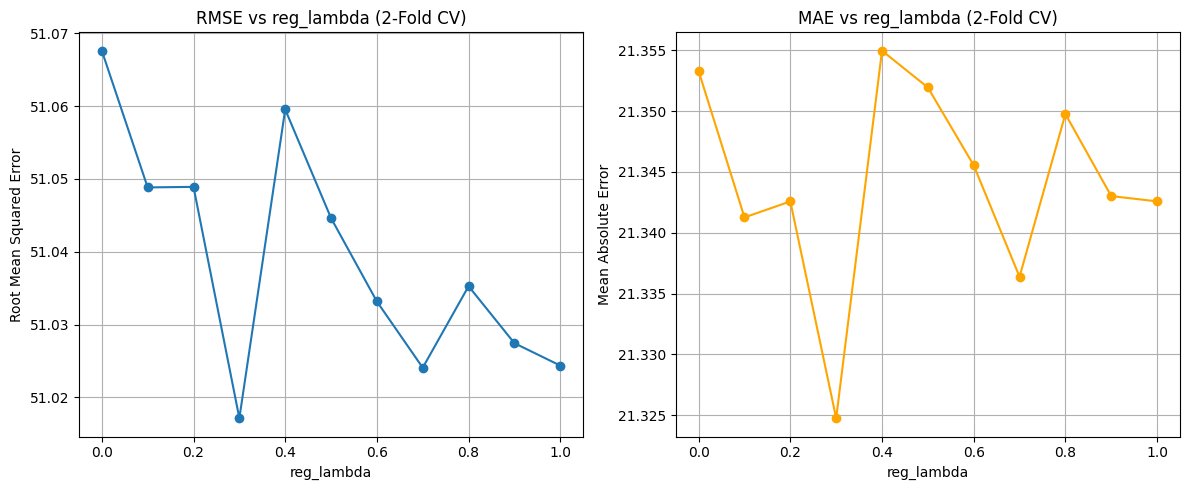

In [13]:
# Define paramter values to search
parameters = {
    "learning_rate": [0.01, 0.03, 0.06, 0.09, 0.1, 0.13, 0.16, 0.19, 0.2, 0.23, 0.26, 0.29, 0.3],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "min_split_loss": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # gamma
    "reg_alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "reg_lambda": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

for parameter, values in parameters.items():

    # Initialize lists to store results of parameter tries
    rmse_results = []
    mae_results = []

    # K-Fold Cross-Validation
    kf = KFold(n_splits=2, shuffle=True, random_state=42)

    # Loop through and test each parameter values
    for parameter_value in values:
        # Initialize lists to store results of folds tries
        rmse_folds = []
        mae_folds = []
    
        fold_number = 0
        for train_index, test_index in kf.split(X):
            fold_number += 1
            print(f"Trying {parameter} = {parameter_value}, K-Fold: {fold_number}")
    
            # Get train and test sets
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    
            # Build xgboost model
            model = xgb.XGBRegressor(
                learning_rate=parameter_value if parameter == "learning_rate" else 0.3,
                n_estimators=parameter_value if parameter == "n_estimators" else 100,
                max_depth=parameter_value if parameter == "max_depth" else 6,
                min_child_weight=parameter_value if parameter == "min_child_weight" else 1,
                subsample=parameter_value if parameter == "subsample" else 1,
                colsample_bytree=parameter_value if parameter == "colsample_bytree" else 1,
                min_split_loss=parameter_value if parameter == "min_split_loss" else 1,
                reg_alpha=parameter_value if parameter == "reg_alpha" else 0,
                reg_lambda=parameter_value if parameter == "reg_lambda" else 1,
                enable_categorical=True,
                objective='reg:squarederror', 
                eval_metric='rmse',
                random_state=123
            )
                
            model.fit(X_train, y_train)
    
            # Predict
            predictions = model.predict(X_test)
            
            # Calculate RMSE and MAE
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
    
            # Store KFold evaluation results
            rmse_folds.append(rmse)
            mae_folds.append(mae)
        
        # Average results across folds
        rmse_results.append(np.mean(rmse_folds))
        mae_results.append(np.mean(mae_folds))
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # RMSE plot
    axs[0].plot(values, rmse_results, marker='o')
    axs[0].set_title(f'RMSE vs {parameter} (2-Fold CV)')
    axs[0].set_xlabel(f'{parameter}')
    axs[0].set_ylabel('Root Mean Squared Error')
    axs[0].grid()
    
    # MAE plot
    axs[1].plot(values, mae_results, marker='o', color='orange')
    axs[1].set_title(f'MAE vs {parameter} (2-Fold CV)')
    axs[1].set_xlabel(f'{parameter}')
    axs[1].set_ylabel('Mean Absolute Error')
    axs[1].grid()
    
    plt.tight_layout()
    plt.show()

## Grid Search

In [23]:
# Set up the parameter grid
param_grid = {
    "max_depth": [6, 8, 9],
    "min_child_weight": [1, 4, 10],
    "reg_lambda": [0.3, 0.7, 1],
}

# Create a custom scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Build xgboost model
model = xgb.XGBRegressor(
    learning_rate=0.3,
    n_estimators=400,
    subsample=1.0,
    colsample_bytree=1.0,
    enable_categorical=True,
    objective='reg:squarederror', 
    eval_metric='rmse',
    random_state=123
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=2,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


C:\Users\mghun\miniconda3\envs\flight-delay\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mghun\miniconda3\envs\flight-delay\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mghun\miniconda3\envs\flight-delay\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\mghun\miniconda3\envs\flight-delay\Lib\site-packages\xgboost\sklearn.py", line 1081, in fit
    

Best Parameters: {'max_depth': 6, 'min_child_weight': 10, 'reg_lambda': 0.7}
Best Cross-Validation Score: 53.09785524815196
